In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# file for data 
file_loc = 'https://github.com/jenfly/opsd/raw/master/opsd_germany_daily.csv'

In [13]:
opsd_daily = pd.read_csv('opsd_germany_daily.txt', index_col=0, parse_dates=True)
opsd_daily.shape

(4383, 4)

In [7]:
# to_datetime() to create timestamps from strings to variety of date time
p = pd.to_datetime('2018-01-15 3:45pm')
w = pd.to_datetime('7/8/1952')
print(p) # this is a timestamp now

2018-01-15 15:45:00


In [8]:
p = pd.to_datetime(['2018/1/5', '7/8/2017', 'Oct 10, 1995'])
print(p)

DatetimeIndex(['2018-01-05', '2017-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)


In [9]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [10]:
opsd_daily.dtypes


Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [11]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [14]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [0]:
# datetimeindex allows diff attributes of date to be extracted from obj
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday_name
opsd_daily.sample(5,random_state=0)

In [16]:
# time based indexing to organize and access our data, use 'loc' accessor
opsd_daily.loc['2017-08-10']

Consumption     1351.49
Wind            100.274
Solar             71.16
Wind+Solar      171.434
Year               2017
Month                 8
Weekday        Thursday
Name: 2017-08-10 00:00:00, dtype: object

In [0]:
# partial string match with loc
opsd_daily.loc['2016-02']

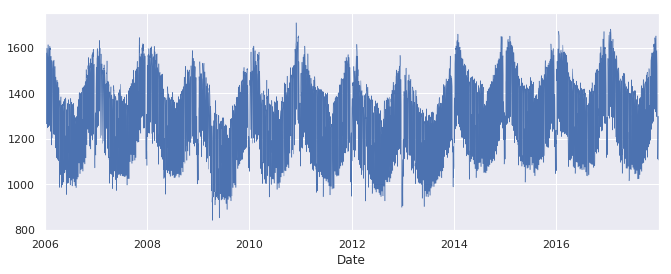

In [18]:
# set figure and styling for plots
sns.set(rc={'figure.figsize':(11,4)})
opsd_daily['Consumption'].plot(linewidth=0.5);

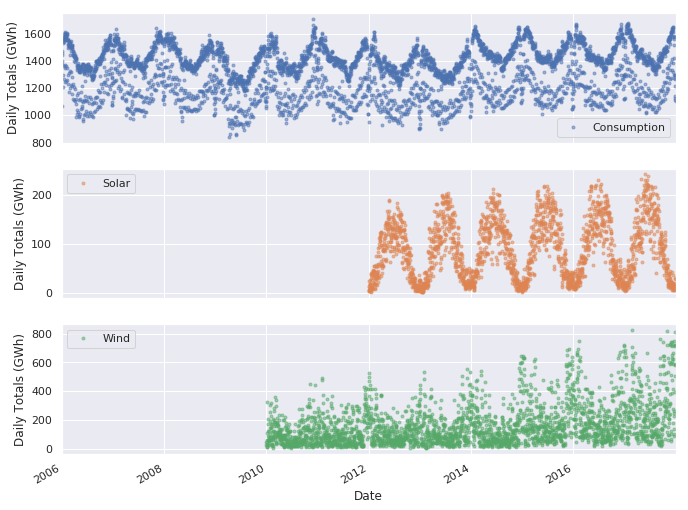

In [20]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9), subplots=True)
for x in axes:
  x.set_ylabel('Daily Totals (GWh)')

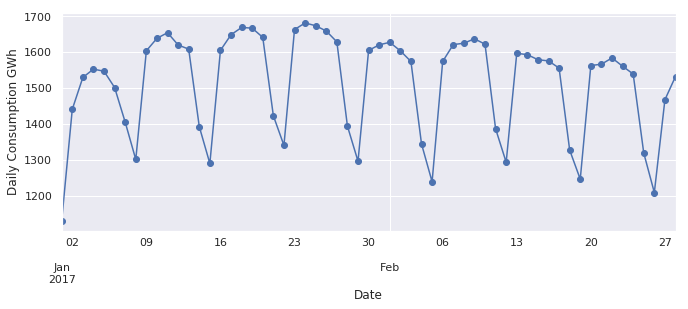

In [24]:
# graphs show oscillating between seasonality, increased use in winter
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption GWh');

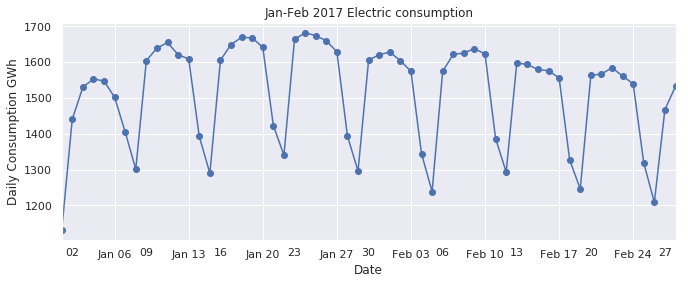

In [26]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption GWh')
ax.set_title("Jan-Feb 2017 Electric consumption")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
# this sets all ticks to be on Mondays for delineating time series

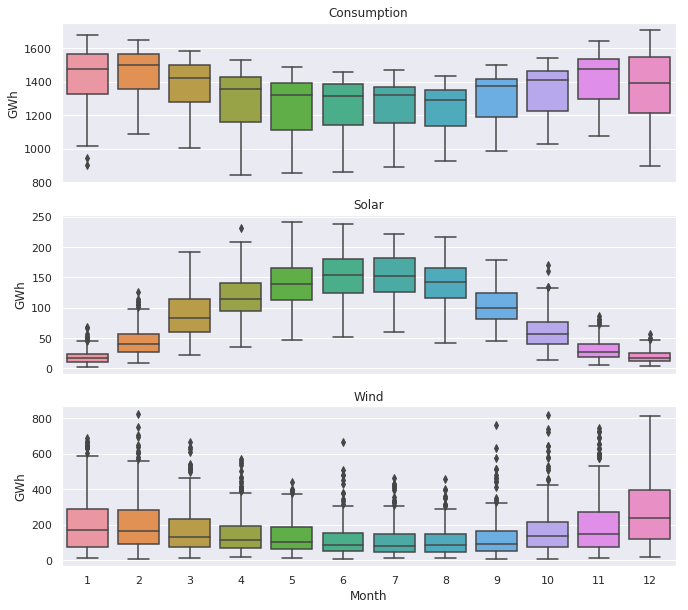

In [27]:
# visualize in box plots, group data by time periods and display distributions
fig, axes = plt.subplots(3,1, figsize=(11,10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
  sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)
  if ax != axes[-1]:
    ax.set_xlabel('')

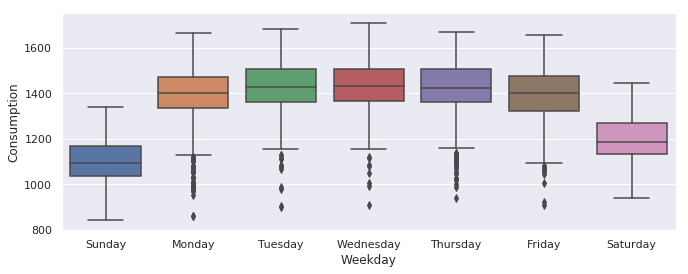

In [28]:
# group consupmtion by day of week
sns.boxplot(data=opsd_daily, x='Weekday', y='Consumption')

In [29]:
# frequencies D=daily B=bus daily W=weekly M=monthly H=hourly Q=quarterly or can use 4D for every 4 days
pd.date_range('1998-03-10', '1998-03-15', freq='D')
# 

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [30]:
pd.date_range('2004-09-20', periods=8, freq='H')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [32]:
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
con_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()
con_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [33]:
# now use asfreq() to convert DF to daily frequency
con_freq = con_sample.asfreq('D')
con_freq['Consumption - Forward Fill'] = con_sample.asfreq('D', method='ffill')
con_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


In [34]:
# resample = downsampling - aggregate monthly sales data from daily data
# upsampling = resampling to higher freq, involves interpolation or other data filling method
# RESAMPLE() method returns resampler obj, similar to groupby, then cam apply aggregation method
data_cols = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# resample weekly frequency aggregating with mean
opsd_weekly_mean = opsd_daily[data_cols].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [35]:
print(opsd_weekly_mean.shape[0])

627


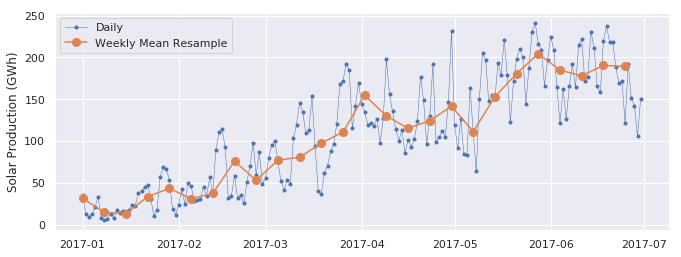

In [36]:
# plot daily and weekly Solar time series over 6 month period to compare
start, end = '2017-01', '2017-06'
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

In [37]:
# resample with monthly freq
opsd_monthly = opsd_daily[data_cols].resample('M').sum(min_count=28)
opsd_monthly.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN


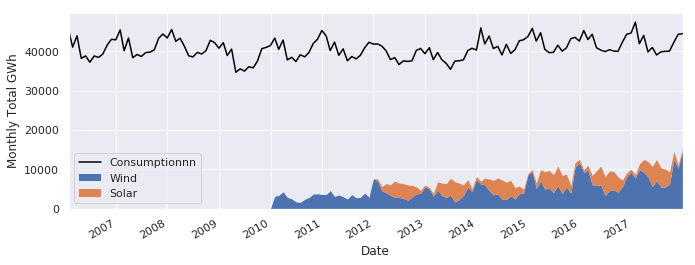

In [38]:
fig, ax = plt.subplots()
ax.plot(opsd_monthly['Consumption'], color='black', label='Consumptionnn')
opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total GWh');

In [39]:
# annual frequency
opsd_annual = opsd_daily[data_cols].resample('A').sum(min_count=360)
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'
# compute wind + solar consupmtipn
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


In [40]:
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday


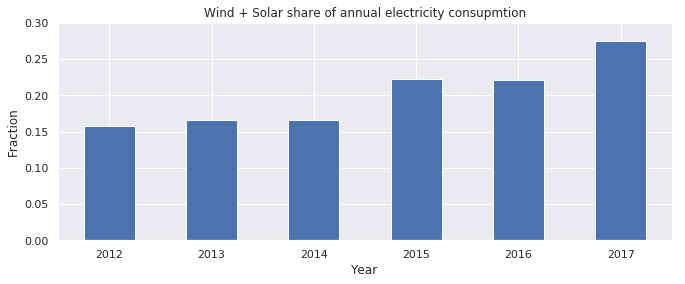

In [42]:
ax = opsd_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0,0.3)
ax.set_title('Wind + Solar share of annual electricity consupmtion')
plt.xticks(rotation=0);

In [43]:
# rolling windows = time windows with data aggregated with mean/median etc
# time bins  overlap and roll along same freq as input data
# all data points within window are equally weighted in aggregation, can depend on type (gaussian, triangular etc)
# calc 7-day rolling mean
opsd_7d = opsd_daily[data_cols].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


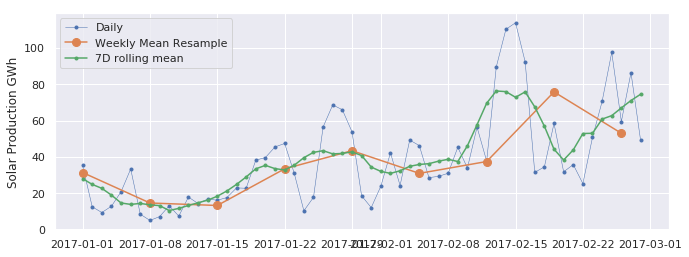

In [44]:
# plot alongside our weekly resampled data
start, end = '2017-01', '2017-02'
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, linestyle='-', label="Weekly Mean Resample")
ax.plot(opsd_7d.loc[start:end, 'Solar'], marker='.', linestyle='-', label='7D rolling mean')
ax.set_ylabel('Solar Production GWh')
ax.legend();


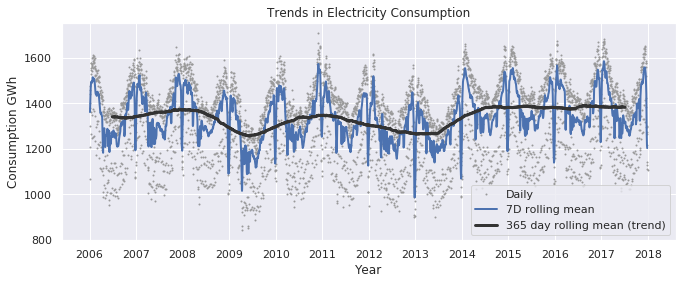

In [45]:
# rolling mean can smooth out time series avging out variations at frequencies much higher than window size
# look at yearly rolling mean
opsd_365 = opsd_daily[data_cols].rolling(window=365, center=True, min_periods=360).mean()
# plot 7 and 365 day rolling means + daily consupmtion
fig, ax = plt.subplots()
ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6', linestyle='None', label='Daily')
ax.plot(opsd_7d['Consumption'], linewidth=2, label='7D rolling mean')
ax.plot(opsd_365['Consumption'], color='0.2', linewidth=3, label='365 day rolling mean (trend)')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel("Consumption GWh")
ax.set_title('Trends in Electricity Consumption');

Text(0.5, 1.0, 'Trends In Electricity Production 365 means')

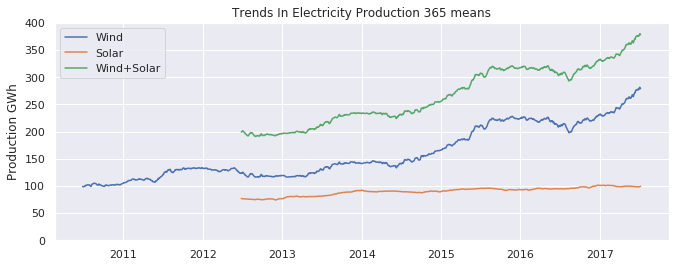

In [46]:
# look at wind, solar rolling time means
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
  ax.plot(opsd_365[nm], label=nm)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_ylim(0,400)
ax.legend()
ax.set_ylabel('Production GWh')
ax.set_title("Trends In Electricity Production 365 means")